In [2]:
!pip install 'tensorflow == 2.3.0'

ERROR: Invalid requirement: "'tensorflow"


In [3]:
import os
import numpy as np
import shutil
import time

In [1]:
%pwd

'C:\\Users\\LG\\anaconda3\\envs\\roadmap'

In [4]:
rootdir= './참외/train/' #path of the original folder
classes = ['참외정상', '참외노균병']

In [5]:
!rm -rf './train'  # 리눅스명령어? rm -파일 혹은 디렉토리 삭제
!rm -rf './valid'

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [6]:
for i in classes:
    os.makedirs('./train/' + i)
    os.makedirs('./valid/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    #print(allFileNames)
    np.random.shuffle(allFileNames)
    test_ratio = 0.25
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*(1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/'+ name for name in test_FileNames.tolist()]
    for name in train_FileNames:
        shutil.copy(name,'./train/' + i)
    for name in test_FileNames:
        shutil.copy(name,'./valid/' + i)

In [43]:
# Directory with our training Tomato_healthy pictures
train_healthy_dir = os.path.join('./train/참외정상')

# Directory with our training Tomato_Late_blight pictures
train_unhealthy_dir = os.path.join('./train/참외노균병')

# Directory with our validation Tomato_healthy pictures
valid_healthy_dir = os.path.join('./valid/참외정상')

# Directory with our validation Tomato_Late_blight pictures
valid_unhealthy_dir = os.path.join('./valid/참외노균병')

In [44]:
train_healthy_names = os.listdir(train_healthy_dir)
print(train_healthy_names[:10])

train_unhealthy_names = os.listdir(train_unhealthy_dir)
print(train_unhealthy_names[:10])

validation_healthy_names = os.listdir(valid_healthy_dir)
print(validation_healthy_names[:10])

validation_unhealthy_names = os.listdir(valid_unhealthy_dir)
print(validation_unhealthy_names[:10])

['참외정상_1.jpg', '참외정상_10.jpg', '참외정상_100.jpg', '참외정상_1001.jpg', '참외정상_1005.jpg', '참외정상_1007.jpg', '참외정상_1008.jpg', '참외정상_102.jpg', '참외정상_103.jpg', '참외정상_105.jpg']
['참외노균병_1.jpg', '참외노균병_10.jpg', '참외노균병_100.jpg', '참외노균병_1000.jpg', '참외노균병_1002.jpg', '참외노균병_1003.jpg', '참외노균병_101.jpg', '참외노균병_103.jpg', '참외노균병_105.jpg', '참외노균병_107.jpg']
['참외정상_1000.jpg', '참외정상_1002.jpg', '참외정상_1003.jpg', '참외정상_1004.jpg', '참외정상_1006.jpg', '참외정상_101.jpg', '참외정상_104.jpg', '참외정상_106.jpg', '참외정상_110.jpg', '참외정상_111.jpg']
['참외노균병_1001.jpg', '참외노균병_102.jpg', '참외노균병_104.jpg', '참외노균병_106.jpg', '참외노균병_109.jpg', '참외노균병_112.jpg', '참외노균병_118.jpg', '참외노균병_119.jpg', '참외노균병_128.jpg', '참외노균병_13.jpg']


In [45]:
print('total training 참외정상 images:', len(os.listdir(train_healthy_dir)))
print('total training 참외노균병 images:', len(os.listdir(train_unhealthy_dir)))
print('total validation 참외정상 images:', len(os.listdir(valid_healthy_dir)))
print('total validation 참외노균병 images:', len(os.listdir(valid_unhealthy_dir)))

total training 참외정상 images: 756
total training 참외노균병 images: 752
total validation 참외정상 images: 252
total validation 참외노균병 images: 251


In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

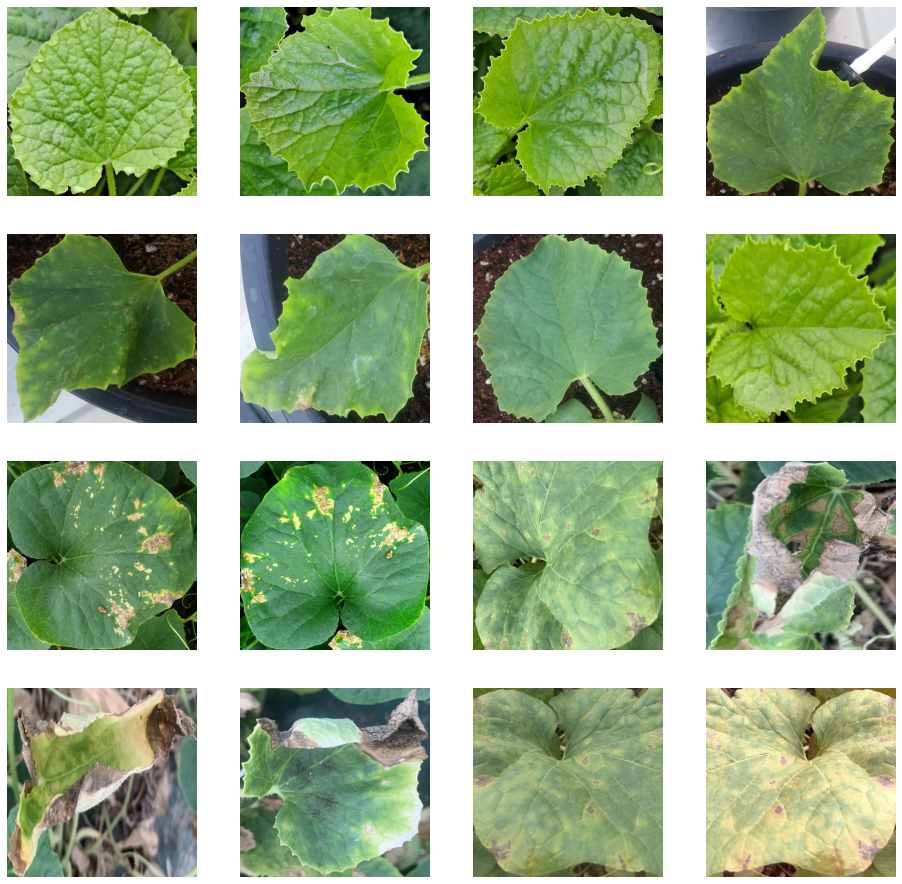

In [47]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_healthy_pic = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]
next_unhealthy_pic = [os.path.join(train_unhealthy_dir, fname) 
                for fname in train_unhealthy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_healthy_pic + next_unhealthy_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train/',  # This is the source directory for training images
        classes = ['참외정상', '참외노균병'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './valid/',  # This is the source directory for training images
        classes = ['참외정상', '참외노균병'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 1508 images belonging to 2 classes.
Found 503 images belonging to 2 classes.


In [49]:
#MobileNetV2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [50]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model.compile(optimizer=RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [53]:
st=time.perf_counter()
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=7,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/7
8/8 [==============================] - 19s 2s/step - loss: 0.9044 - accuracy: 0.7115 - val_loss: 0.0802 - val_accuracy: 0.9868
Epoch 2/7
8/8 [==============================] - 18s 2s/step - loss: 0.0858 - accuracy: 0.9758 - val_loss: 0.0840 - val_accuracy: 0.9868
Epoch 3/7
8/8 [==============================] - 19s 2s/step - loss: 0.0591 - accuracy: 0.9890 - val_loss: 0.1127 - val_accuracy: 0.9671
Epoch 4/7
8/8 [==============================] - 19s 2s/step - loss: 0.2224 - accuracy: 0.9053 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 5/7
8/8 [==============================] - 20s 2s/step - loss: 0.0271 - accuracy: 0.9945 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/7
8/8 [==============================] - 20s 3s/step - loss: 0.0221 - accuracy: 0.9958 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 7/7
8/8 [==============================] - 20s 3s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000


In [54]:
print("train_time: ",nd-st)

train_time:  134.66525320000073


In [55]:
model.evaluate(validation_generator)

27/27 [==============================] - 8s 280ms/step - loss: 0.0176 - accuracy: 0.9980


[0.017624370753765106, 0.9980119466781616]

In [56]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

27/27 [==============================] - 9s 298ms/step


In [57]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [58]:
roc_auc = auc(fpr, tpr)

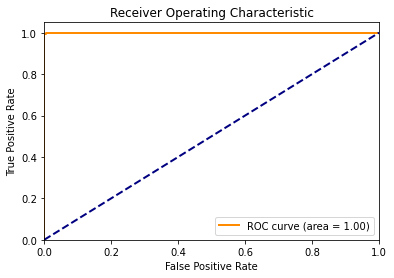

In [59]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [60]:
model.save('참외노균병mnet2.h5')
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(200, 200))
#   x = image.img_to_array(img)
#   plt.imshow(x/255.)
#   x = np.expand_dims(x, axis=0)
#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]<0.5:
#     print(fn + " is 참외정상")
#   else:
#     print(fn + " is 참외노균병")
 

In [61]:
#SqueezeNet
bnmomemtum=0.9
def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)
x = tf.keras.layers.Input(shape=[200,200, 3]) # input is 200x200 pixels RGB
y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1, activation='sigmoid')(y)

model2 = tf.keras.Model(x, y)

model2.compile(
optimizer='adam',
loss= 'binary_crossentropy',
metrics=['accuracy'])
model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 200, 200, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_32 (BatchN  (None, 200, 200, 32  128        ['conv2d_32[0][0]']              
 ormalization)                  )                                                           

 ormalization)                                                                                    
                                                                                                  
 conv2d_43 (Conv2D)             (None, 25, 25, 48)   2352        ['batch_normalization_42[0][0]'] 
                                                                                                  
 conv2d_44 (Conv2D)             (None, 25, 25, 48)   20784       ['batch_normalization_42[0][0]'] 
                                                                                                  
 batch_normalization_43 (BatchN  (None, 25, 25, 48)  192         ['conv2d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_44 (BatchN  (None, 25, 25, 48)  192         ['conv2d_44[0][0]']              
 ormalizat

In [62]:
st=time.perf_counter()
history = model2.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=7,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/7
8/8 [==============================] - 124s 15s/step - loss: 0.4052 - accuracy: 0.8281 - val_loss: 0.6680 - val_accuracy: 0.9737
Epoch 2/7
8/8 [==============================] - 145s 18s/step - loss: 0.2248 - accuracy: 0.9185 - val_loss: 0.1896 - val_accuracy: 1.0000
Epoch 3/7
8/8 [==============================] - 180s 23s/step - loss: 0.1612 - accuracy: 0.9515 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 4/7
8/8 [==============================] - 173s 21s/step - loss: 0.1128 - accuracy: 0.9780 - val_loss: 0.2794 - val_accuracy: 0.8947
Epoch 5/7
8/8 [==============================] - 180s 23s/step - loss: 0.0837 - accuracy: 0.9791 - val_loss: 0.6790 - val_accuracy: 0.7434
Epoch 6/7
8/8 [==============================] - 175s 22s/step - loss: 0.0662 - accuracy: 0.9823 - val_loss: 0.4303 - val_accuracy: 0.7697
Epoch 7/7
8/8 [==============================] - 158s 19s/step - loss: 0.0468 - accuracy: 0.9945 - val_loss: 0.0840 - val_accuracy: 0.9868


In [63]:
print("train time-squeezenet: ", nd-st)

train time-squeezenet:  1135.657742899999


In [64]:
model2.evaluate(validation_generator)

27/27 [==============================] - 20s 729ms/step - loss: 0.1407 - accuracy: 0.9503


[0.14065136015415192, 0.9502981901168823]

In [65]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model2.predict(validation_generator,
                      verbose=1)

27/27 [==============================] - 21s 760ms/step


In [66]:
fpr2, tpr2, _ = roc_curve(validation_generator.classes, preds)

In [67]:
roc_auc2 = auc(fpr, tpr)

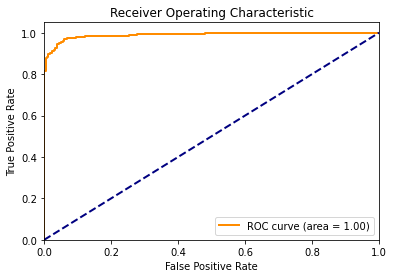

In [68]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
model.save('참외노균병snet2.h5')

[참고자료] https://velog.io/@sset2323/03-05.-ROC-%EA%B3%A1%EC%84%A0%EA%B3%BC-AUC